In [1]:
#Les packages
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.utils import shuffle

# Importation du dataset et pre-processiong 

In [2]:
#Importer les données
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalisation
x_train, x_test =  x_train/255, x_test/255

In [4]:
#On doit changer le format des images en une couche entiérement connctée ie. un 1D array(28*28)
num_pixels = 784
x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0],num_pixels)

In [5]:
#Permet de créer le dataset de 100 images avec 10 images de chaque classes
#La fonction retourne un tuple de 2 listes : les images et leurs classes 
def split_by_label(x_train, y_train, num_per_label):
    # pick out the same size label from data set
    counter = np.zeros(10)  # for 10 classes
    new_dataset_x = []
    new_dataset_y = []
    for x, y in zip(x_train, y_train):
        #x, y = i
        if type(y) == np.ndarray:
            y = np.argmax(y)
        if y == 0 and counter[0] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[0] += 1
            continue
        if y == 1 and counter[1] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[1] += 1
            continue
        if y == 2 and counter[2] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[2] += 1
            continue
        if y == 3 and counter[3] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[3] += 1
            continue
        if y == 4 and counter[4] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[4] += 1
            continue
        if y == 5 and counter[5] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[5] += 1
            continue

        if y == 6 and counter[6] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[6] += 1
            continue

        if y == 7 and counter[7] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[7] += 1
            continue

        if y == 8 and counter[8] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[8] += 1

            continue

        if y == 9 and counter[9] < num_per_label:
            new_dataset_x.append(x)
            new_dataset_y.append(y)
            counter[9] += 1
            continue

    print(counter)
    return new_dataset_x, new_dataset_y

In [6]:
 #training_small_data contient les 100 images et leur labels
 num_per_label = 10
 training_data_small = split_by_label(x_train, y_train, num_per_label)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [7]:
#Récupérer les images et leurs labels 
x_train_small = training_data_small[0]
y_train_small = training_data_small[1]
#Les transformer en des numpy array 
x_train_small_array = np.array(x_train_small)
y_train_small_array = np.array(y_train_small)

In [8]:
#Mélanger les données pour éviter que l'ordre est un impacte sur l'entrainement 
tf.random.set_seed(42)
x_train_small_array, y_train_small_array = shuffle(x_train_small_array, y_train_small_array)

# Baseline : Réseau de neurones pur

In [9]:
# réseau de neurone avec une seule couche cachée de 5000 neurones 
model_NN = Sequential()
model_NN.add(Dense(5000, input_dim=784, activation='relu'))
model_NN.add(Dense(10, activation='sigmoid'))

In [10]:
model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              3925000   
                                                                 
 dense_1 (Dense)             (None, 10)                50010     
                                                                 
Total params: 3,975,010
Trainable params: 3,975,010
Non-trainable params: 0
_________________________________________________________________


In [11]:
#configuration du modèle
model_NN.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#les batchs size utilisé pour l'apprentissage
batchSize = 32

In [13]:
#apprentissage du modèle avec les 100 images labélisés uniquement
history = model_NN.fit(x_train_small_array, y_train_small_array, epochs= 20, batch_size= batchSize)

Epoch 1/20
4/4 [==============================] - 1s 25ms/step - loss: 2.1864 - accuracy: 0.2100
Epoch 2/20
4/4 [==============================] - 0s 25ms/step - loss: 0.6720 - accuracy: 0.9000
Epoch 3/20
4/4 [==============================] - 0s 26ms/step - loss: 0.3010 - accuracy: 0.9500
Epoch 4/20
4/4 [==============================] - 0s 36ms/step - loss: 0.1132 - accuracy: 0.9900
Epoch 5/20
4/4 [==============================] - 0s 27ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 26ms/step - loss: 0.0293 - accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 27ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 25ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 28ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 26ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 11/20
4/4 [============

In [14]:
#Evaluation du modèle pour connaitre son accuracy
model_NN.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.3044 - accuracy: 0.7040


[1.3043766021728516, 0.7039999961853027]

# DropNN

In [16]:
# DropNN : c'est un réseau de neurones avec un Dropout de 0.5 pour les layers cachés et 0.2 pour layer des inputs
model_dropNN = Sequential()
model_dropNN.add(Dropout(0.2, input_shape=(784,)))
model_dropNN.add(Dense(5000,  activation='relu'))
model_dropNN.add(Dropout(0.5))
model_dropNN.add(Dense(10, activation='sigmoid'))

In [17]:
#configuration du optimizer
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 1.5,
    decay_steps= 10,
    decay_rate=0.88)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [18]:
#configuration du modèle DropNN
model_dropNN.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Apprentissage avec les 100 images uniquement
history_dropNN = model_dropNN.fit(x_train_small_array, y_train_small_array, epochs= 500, batch_size= batchSize)

Epoch 1/500
4/4 [==============================] - 0s 23ms/step - loss: 22.3808 - accuracy: 0.0600
Epoch 2/500
4/4 [==============================] - 0s 21ms/step - loss: 574.7015 - accuracy: 0.0800
Epoch 3/500
4/4 [==============================] - 0s 21ms/step - loss: 51.9038 - accuracy: 0.1000
Epoch 4/500
4/4 [==============================] - 0s 20ms/step - loss: 72.8398 - accuracy: 0.1000
Epoch 5/500
4/4 [==============================] - 0s 24ms/step - loss: 123.9310 - accuracy: 0.1600
Epoch 6/500
4/4 [==============================] - 0s 25ms/step - loss: 28.7236 - accuracy: 0.2000
Epoch 7/500
4/4 [==============================] - 0s 26ms/step - loss: 49.1005 - accuracy: 0.1500
Epoch 8/500
4/4 [==============================] - 0s 21ms/step - loss: 46.9451 - accuracy: 0.2200
Epoch 9/500
4/4 [==============================] - 0s 24ms/step - loss: 23.4212 - accuracy: 0.2800
Epoch 10/500
4/4 [==============================] - 0s 25ms/step - loss: 16.6405 - accuracy: 0.2700
Epoch 1

In [20]:
#Evaluation des performances du modèle
model_dropNN.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.2273 - accuracy: 0.7097


[1.227323293685913, 0.7096999883651733]

# +PL

In [21]:
#Prédiction pour obtenir les pseudo-labels pour les données d'entrainement non labelisées avec le drop_NN
pred = model_dropNN.predict(x_train)
y_pseudo_label = list()
for i in range(len(pred)):
    y_pseudo_label.append(np.argmax(pred[i]))

In [22]:
# Instantier optimizer.
optimizer_PL = keras.optimizers.Adam()
#lr_schedule_PL = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate= 1.5,
#    decay_steps= 10,
#    decay_rate=0.88)

# Instantier la fonction de coût.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True) #from_logits=True

# Preparation des deux datasets d'apprentissages : 100 images labelisés (train_dataset_label) et les images avec pseudoLabels (train_dataset_PL)
batch_size_label = 32
batch_size_PL = 256
train_dataset_label = tf.data.Dataset.from_tensor_slices((x_train_small_array, y_train_small_array))
train_dataset_label = train_dataset_label.shuffle(buffer_size=1024).batch(batch_size_label)
train_dataset_PL = tf.data.Dataset.from_tensor_slices((x_train, y_pseudo_label))
train_dataset_PL = train_dataset_PL.shuffle(buffer_size=1024).batch(batch_size_PL)

In [23]:
#cette fonction calcule loss value pour chaque batch
@tf.function
def train_step(x_label, y_label, x_PL, y_PL, epoch):
    alpha = 0.
    T1 = 100
    T2 = 600
    af = 3.
    #Ouvre un GradientTape pour enregistrer les opérations effectués lors, ce qui permet l'auto-differentiation
    with tf.GradientTape() as tape:
            # Exécuter le forward pass de la couche
            # Les opération que la couche effectue à ses inputs
            # vont être enregistré dans le GradientTape
           
      logits_label = model_dropNN(x_label, training=True)
      logits_PL = model_dropNN(x_PL, training=True)
      if epoch > T1:
        alpha = ((epoch - T1) / (T2 - T1)) * af
        if epoch > T2:
          alpha = af
       # Calculer la loss value pour le minibatch.
      loss_value = loss_fn(y_label, logits_label) + alpha * loss_fn(y_PL, logits_PL)
    # Utiliser le gradient tape pour récupéer automatiquement
    # les gradients des variables entraînables par rapport à la perte.
    grads = tape.gradient(loss_value, model_dropNN.trainable_weights)
    # Exécuter une étape de descente de gradient en mettant
    # à jour la valeur des variables pour minimiser la perte.
    optimizer_PL.apply_gradients(zip(grads, model_dropNN.trainable_weights))
    return loss_value

In [24]:
#entrainement du drop NN avec PL
import time

epochs = 500
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()
    step = 1
    
 
    # Iterer sur l'ensemble des batchs.
    for   (x_batch_label, y_batch_label), (x_batch_PL, y_batch_PL)  in zip(train_dataset_label, train_dataset_PL):
        loss_value = train_step(x_batch_label, y_batch_label, x_batch_PL, y_batch_PL, epoch)


    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Time taken: 1.49s

Start of epoch 1
Time taken: 1.03s

Start of epoch 2
Time taken: 1.01s

Start of epoch 3
Time taken: 1.02s

Start of epoch 4
Time taken: 1.02s

Start of epoch 5
Time taken: 1.15s

Start of epoch 6
Time taken: 0.97s

Start of epoch 7
Time taken: 0.96s

Start of epoch 8
Time taken: 0.95s

Start of epoch 9
Time taken: 0.95s

Start of epoch 10
Time taken: 0.96s

Start of epoch 11
Time taken: 0.97s

Start of epoch 12
Time taken: 0.98s

Start of epoch 13
Time taken: 0.98s

Start of epoch 14
Time taken: 0.98s

Start of epoch 15
Time taken: 0.99s

Start of epoch 16
Time taken: 0.98s

Start of epoch 17
Time taken: 0.97s

Start of epoch 18
Time taken: 0.99s

Start of epoch 19
Time taken: 0.98s

Start of epoch 20
Time taken: 0.98s

Start of epoch 21
Time taken: 0.97s

Start of epoch 22
Time taken: 0.96s

Start of epoch 23
Time taken: 0.98s

Start of epoch 24
Time taken: 0.99s

Start of epoch 25
Time taken: 0.98s

Start of epoch 26
Time taken: 1.16s

Start of epoch 27
Time taken

In [25]:
#Evaluation
model_dropNN.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 3.0775 - accuracy: 0.7355


[3.0774893760681152, 0.7354999780654907]

# +PL+DAE

## Unsupervised pre-training: Denoising Auto-Encoder (DAE)

In [26]:
#Ajouter du bruit gaussien aux images avec une proba de 0.5 
noise_proba=0.5
x_train_noisy = x_train + noise_proba * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_proba * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [27]:
#Limiter les valeurs des pixels entre 0 et 1 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [28]:
#DAE avec Dropout
model_DAE = Sequential()
model_DAE.add(Dense(5000, input_dim=784, activation='relu'))
model_DAE.add(Dropout(0.5))
model_DAE.add(Dense(128, activation='relu'))
model_DAE.add(Dense(64, activation='relu'))
model_DAE.add(Dense(32, activation='relu'))
model_DAE.add(Dense(64, activation='relu'))
model_DAE.add(Dense(128, activation='relu'))
model_DAE.add(Dense(5000, activation='relu'))
model_DAE.add(Dropout(0.5))
model_DAE.add(Dense(784, activation='sigmoid'))

In [29]:
model_DAE.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5000)              3925000   
                                                                 
 dropout_2 (Dropout)         (None, 5000)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               640128    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)              

In [30]:
model_DAE.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model_DAE.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1879 - accuracy: 0.0117 - val_loss: 0.1523 - val_accuracy: 0.0079
Epoch 2/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1540 - accuracy: 0.0125 - val_loss: 0.1412 - val_accuracy: 0.0158
Epoch 3/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1458 - accuracy: 0.0130 - val_loss: 0.1363 - val_accuracy: 0.0123
Epoch 4/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.1417 - accuracy: 0.0139 - val_loss: 0.1320 - val_accuracy: 0.0166
Epoch 5/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.1390 - accuracy: 0.0141 - val_loss: 0.1310 - val_accuracy: 0.0158
Epoch 6/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.1370 - accuracy: 0.0143 - val_loss: 0.1278 - val_accuracy: 0.0166
Epoch 7/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.1352 - accuracy: 0.0142 - val_loss: 0

In [32]:
predicted = model_DAE.predict(x_test_noisy)

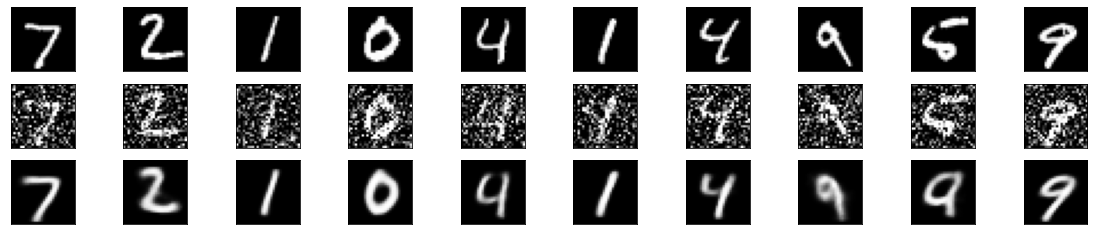

In [33]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # Afficher les images originales
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Afficher les images bruitées
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Afficher les images reconstruites
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [34]:
#Enregistrer le DAE en format h5
model_DAE.save("DAE.h5")

## DropNN initialisé avec DAE

In [36]:
#Recharger le DAE pré-entrainé 
pretrained_DAE = tf.keras.models.load_model("DAE.h5")
pretrained_DAE.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5000)              3925000   
                                                                 
 dropout_2 (Dropout)         (None, 5000)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               640128    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)              

In [37]:
#Supprimer les couches pour garder qu'une seule couche caché de 5000 neurones 
x = pretrained_DAE.layers[-9].output

#Rajouter une couche de classification avec 10 neurones et une fonction d'activation sigmoid 
predictions = Dense(10, activation='sigmoid')(x)
model_dropNN_DAE = Model(inputs=pretrained_DAE.input, outputs=predictions)
model_dropNN_DAE.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4_input (InputLayer)  [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 5000)              3925000   
                                                                 
 dropout_2 (Dropout)         (None, 5000)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                50010     
                                                                 
Total params: 3,975,010
Trainable params: 3,975,010
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_dropNN_DAE.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model_dropNN_DAE.fit(x_train_small_array, y_train_small_array, epochs= 100, batch_size= 32)

Epoch 1/100
4/4 [==============================] - 1s 31ms/step - loss: 3.1272 - accuracy: 0.1300
Epoch 2/100
4/4 [==============================] - 0s 27ms/step - loss: 1.7659 - accuracy: 0.4500
Epoch 3/100
4/4 [==============================] - 0s 28ms/step - loss: 1.0506 - accuracy: 0.6500
Epoch 4/100
4/4 [==============================] - 0s 27ms/step - loss: 0.6916 - accuracy: 0.7300
Epoch 5/100
4/4 [==============================] - 0s 31ms/step - loss: 0.4779 - accuracy: 0.8800
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 0.3098 - accuracy: 0.9300
Epoch 7/100
4/4 [==============================] - 0s 26ms/step - loss: 0.2190 - accuracy: 0.9200
Epoch 8/100
4/4 [==============================] - 0s 26ms/step - loss: 0.1547 - accuracy: 0.9700
Epoch 9/100
4/4 [==============================] - 0s 28ms/step - loss: 0.1269 - accuracy: 0.9700
Epoch 10/100
4/4 [==============================] - 0s 25ms/step - loss: 0.1480 - accuracy: 0.9500
Epoch 11/100
4/4 [=

In [40]:
model_dropNN_DAE.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0811 - accuracy: 0.7538


[1.0810796022415161, 0.7537999749183655]

## +PL+DAE

In [41]:
#Prédire les pseudo-labels pour les données non labelisées avec le drop_NN initialisé avec DAE
pred = model_dropNN_DAE.predict(x_train)
y_pseudo_label = list()
for i in range(len(pred)):
    y_pseudo_label.append(np.argmax(pred[i]))

In [42]:
# Instantier optimizer.
optimizer_PL = keras.optimizers.Adam(0.0001) #learning_rate=0.001
# Instantier la fonction de coût
loss_fn = keras.losses.SparseCategoricalCrossentropy() #from_logits=True


batch_size_label = 32
batch_size_PL = 256
# Preparation des deux datasets d'apprentissages : 100 images labelisés (train_dataset_label) et les images avec pseudoLabels (train_dataset_PL)
train_dataset_label = tf.data.Dataset.from_tensor_slices((x_train_small_array, y_train_small_array))
train_dataset_label = train_dataset_label.shuffle(buffer_size=1024).batch(batch_size_label)
train_dataset_PL = tf.data.Dataset.from_tensor_slices((x_train, y_pseudo_label))
train_dataset_PL = train_dataset_PL.shuffle(buffer_size=1024).batch(batch_size_PL)

In [43]:
@tf.function
def train_step(x_label, y_label, x_PL, y_PL, epoch):
    alpha = 0.
    T1 = 100
    T2 = 600
    af = 3.
    #Ouvre un GradientTape pour enregistrer les opérations effectués lors, ce qui permet l'auto-differentiation
    with tf.GradientTape() as tape:
      # Exécuter le forward pass de la couche
      # Les opération que la couche effectue à ses inputs
      # vont être enregistré dans le GradientTape
      logits_label = model_dropNN_DAE(x_label, training=True)
      logits_PL = model_dropNN_DAE(x_PL, training=True)
      if epoch > T1:
        alpha = ((epoch - T1) / (T2 - T1)) * af
        if epoch > T2:
          alpha = af
      # Calculer la loss value pour le minibatch.    
      loss_value = loss_fn(y_label, logits_label) + loss_fn(y_PL, logits_PL) #alpha * 
    # Utiliser le gradient tape pour récupéer automatiquement
    # les gradients des variables entraînables par rapport à la perte.
    grads = tape.gradient(loss_value, model_dropNN_DAE.trainable_weights)
    
    # Exécuter une étape de descente de gradient en mettant
    # à jour la valeur des variables pour minimiser la perte.
    optimizer_PL.apply_gradients(zip(grads, model_dropNN_DAE.trainable_weights))
    return loss_value

In [44]:
#entrainement du drop NN DAE avec PL
import time

epochs = 500
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()
    step = 1
    
 
    # Iterer sur l'ensemble des batchs.
    for   (x_batch_label, y_batch_label), (x_batch_PL, y_batch_PL)  in zip(train_dataset_label, train_dataset_PL):
        loss_value = train_step(x_batch_label, y_batch_label, x_batch_PL, y_batch_PL, epoch)

      

    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Time taken: 3.40s

Start of epoch 1
Time taken: 1.62s

Start of epoch 2
Time taken: 2.67s

Start of epoch 3
Time taken: 1.52s

Start of epoch 4
Time taken: 2.67s

Start of epoch 5
Time taken: 1.16s

Start of epoch 6
Time taken: 0.90s

Start of epoch 7
Time taken: 1.21s

Start of epoch 8
Time taken: 0.86s

Start of epoch 9
Time taken: 0.88s

Start of epoch 10
Time taken: 0.87s

Start of epoch 11
Time taken: 0.87s

Start of epoch 12
Time taken: 0.86s

Start of epoch 13
Time taken: 0.86s

Start of epoch 14
Time taken: 0.85s

Start of epoch 15
Time taken: 0.85s

Start of epoch 16
Time taken: 0.86s

Start of epoch 17
Time taken: 0.86s

Start of epoch 18
Time taken: 0.86s

Start of epoch 19
Time taken: 0.86s

Start of epoch 20
Time taken: 1.33s

Start of epoch 21
Time taken: 0.89s

Start of epoch 22
Time taken: 0.88s

Start of epoch 23
Time taken: 0.88s

Start of epoch 24
Time taken: 0.85s

Start of epoch 25
Time taken: 0.88s

Start of epoch 26
Time taken: 0.86s

Start of e

In [45]:
model_dropNN_DAE.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.9265 - accuracy: 0.7560


[1.9264668226242065, 0.7559999823570251]

In [46]:
del model_dropNN_DAE